**Z-scores are often used to detect outliers in a dataset**

**However, z-scores can be affected by unusually large or small data values, which is why a more robust way to detect outliers get proposed**

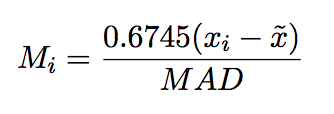

**Modified z-score = 0.6745(xi – x̃) / MAD**

**where:**

**xi: A single data value**

**x̃: The median of the dataset**

**MAD: The median absolute deviation of the dataset**

**Importing Pandas Library**

In [1]:
import pandas as pd

**Reading CSV File**

In [2]:
df = pd.read_csv("height.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


**Looking at the Stastical Value's of Data**

In [3]:
df.height.describe()

count    20.000000
mean      8.390000
std       8.782812
min       1.200000
25%       5.350000
50%       5.700000
75%       6.275000
max      40.200000
Name: height, dtype: float64

**Calculating Median Absolute Deviation**

In [4]:
abs_height_median = abs(df.height - df.height.median())
abs_height_median.head()

0    4.5
1    3.4
2    0.8
3    0.6
4    0.5
Name: height, dtype: float64

In [5]:
mad = abs_height_median.median()
mad

0.5

**Calculating Modified Z-Score**

In [6]:
df["modified_z_score"] = 0.6745 * ((df.height - df.height.median()) / mad)
df.head()

,name,height,modified_z_score
0,mohan,1.2,-6.0705
1,maria,2.3,-4.5866
2,sakib,4.9,-1.0792
3,tao,5.1,-0.8094
4,virat,5.2,-0.6745


**Detecting Outlier's from Data**

In [7]:
df[(df.modified_z_score > 3.5) | (df.modified_z_score < -3.5)]

,name,height,modified_z_score
0,mohan,1.2,-6.0705
1,maria,2.3,-4.5866
17,aamir,14.5,11.8712
18,ken,23.2,23.6075
19,Liu,40.2,46.5405


**Removing Outlier's from Data**

In [8]:
df_no_outlier = df[(df.modified_z_score < 3.5) & (df.modified_z_score > -3.5)]
df_no_outlier

,name,height,modified_z_score
2,sakib,4.9,-1.0792
3,tao,5.1,-0.8094
4,virat,5.2,-0.6745
5,khusbu,5.4,-0.4047
6,dmitry,5.5,-0.2698
7,selena,5.5,-0.2698
8,john,5.6,-0.1349
9,imran,5.6,-0.1349
10,jose,5.8,0.1349
11,deepika,5.9,0.2698
